## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load Data

In [3]:
train_df = pd.read_csv('data/train.csv')
center_info = pd.read_csv('data/fulfilment_center_info.csv')
meal_info = pd.read_csv('data/meal_info.csv')
test_df = pd.read_csv('data/test.csv')


## Inspect Data

### Numerical inspection and summaries

In [5]:
train_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [7]:
center_info

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
...,...,...,...,...,...
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1


In [9]:
meal_info

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian
5,1311,Extras,Thai
6,1062,Beverages,Italian
7,1778,Beverages,Italian
8,1803,Extras,Thai
9,1198,Extras,Thai


In [11]:
test_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0
...,...,...,...,...,...,...,...,...
32568,1250239,155,61,1543,482.09,484.09,0,0
32569,1039516,155,61,2304,483.09,483.09,0,0
32570,1158107,155,61,2664,322.07,323.07,0,0
32571,1444235,155,61,2569,322.07,323.07,0,0


**In addition to the train data, there are additional files with features related to the center and meal**
* *We will have to merge these*

#### Review/Explore the data in each of these dfs ####

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [15]:
center_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [17]:
meal_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


* ***There are no null values in any of the dataframes***

### Check for duplicates

In [19]:
train_df.duplicated().sum()

0

In [21]:
center_info.duplicated().sum()

0

In [23]:
meal_info.duplicated().sum()

0

In [25]:
test_df.duplicated().sum()

0

***No duplicates found***

### Missing values

***There are no null values as seen in df info above***

***However, it is possible there are missing rows where there were no orders for a given week+center_id+meal_id combination***

In [27]:
num_centers = train_df.center_id.nunique()
num_centers

77

In [29]:
num_meals = train_df.meal_id.nunique()
num_meals

51

In [31]:
#Number of unique center-meal combos
center_meal_combos = num_centers * num_meals
center_meal_combos

3927

In [33]:
expected_rows_in_train = num_centers * num_meals * 145
expected_rows_in_train

569415

In [35]:
len(train_df)

456548

In [37]:
missing_rows = expected_rows_in_train - len(train_df)
missing_rows

112867

* ***Looks like the data does not have orders for all center-meal combos for all weeks***

* ***We need to add rows with 0 orders to get a proper time series analysis data - to be able to run Time Series Analysis models?***

#### Convert week to datetime

In [39]:
train_df.week.nunique()

145

In [41]:
train_df['Date'] = pd.to_datetime((train_df['week'] - 1) * 7 * 24 * 60 * 60 * 1000 + 1577836800000, unit='ms')
train_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,Date
0,1379560,1,55,1885,136.83,152.29,0,0,177,2020-01-01
1,1466964,1,55,1993,136.83,135.83,0,0,270,2020-01-01
2,1346989,1,55,2539,134.86,135.86,0,0,189,2020-01-01
3,1338232,1,55,2139,339.50,437.53,0,0,54,2020-01-01
4,1448490,1,55,2631,243.50,242.50,0,0,40,2020-01-01
...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,2022-10-05
456544,1062036,145,61,2304,482.09,482.09,0,0,42,2022-10-05
456545,1110849,145,61,2664,237.68,321.07,0,0,501,2022-10-05
456546,1147725,145,61,2569,243.50,313.34,0,0,729,2022-10-05


## EDA

### Numeric Values

#### Change id columns to category type

In [43]:
train_df[['id', 'center_id', 'meal_id']] = train_df[['id', 'center_id', 'meal_id']].astype('category')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     456548 non-null  category      
 1   week                   456548 non-null  int64         
 2   center_id              456548 non-null  category      
 3   meal_id                456548 non-null  category      
 4   checkout_price         456548 non-null  float64       
 5   base_price             456548 non-null  float64       
 6   emailer_for_promotion  456548 non-null  int64         
 7   homepage_featured      456548 non-null  int64         
 8   num_orders             456548 non-null  int64         
 9   Date                   456548 non-null  datetime64[ns]
dtypes: category(3), datetime64[ns](1), float64(2), int64(4)
memory usage: 46.6 MB


In [45]:
train_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,Date
0,1379560,1,55,1885,136.83,152.29,0,0,177,2020-01-01
1,1466964,1,55,1993,136.83,135.83,0,0,270,2020-01-01
2,1346989,1,55,2539,134.86,135.86,0,0,189,2020-01-01
3,1338232,1,55,2139,339.50,437.53,0,0,54,2020-01-01
4,1448490,1,55,2631,243.50,242.50,0,0,40,2020-01-01


In [47]:
train_df.describe()

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,Date
count,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548
mean,74.768771,332.238933,354.156627,0.081152,0.10920,261.872760,2021-05-31 09:09:12.882938624
min,1.000000,2.970000,55.350000,0.000000,0.00000,13.000000,2020-01-01 00:00:00
25%,39.000000,228.950000,243.500000,0.000000,0.00000,54.000000,2020-09-23 00:00:00
50%,76.000000,296.820000,310.460000,0.000000,0.00000,136.000000,2021-06-09 00:00:00
75%,111.000000,445.230000,458.870000,0.000000,0.00000,324.000000,2022-02-09 00:00:00
max,145.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,2022-10-05 00:00:00
std,41.524956,152.939723,160.715914,0.273069,0.31189,395.922798,NaN


array([[<Axes: title={'center': 'checkout_price'}>,
        <Axes: title={'center': 'base_price'}>],
       [<Axes: title={'center': 'emailer_for_promotion'}>,
        <Axes: title={'center': 'homepage_featured'}>],
       [<Axes: title={'center': 'num_orders'}>, <Axes: >]], dtype=object)

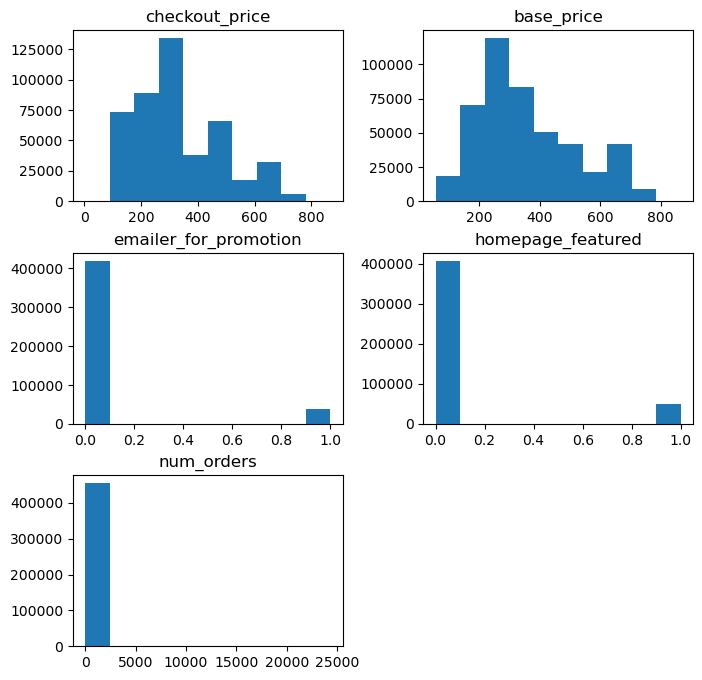

In [49]:
train_df.hist(['checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders'], figsize = (8, 8), grid = False)

In [51]:
center_info[['center_id']] = center_info[['center_id']].astype('category')
center_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   center_id    77 non-null     category
 1   city_code    77 non-null     int64   
 2   region_code  77 non-null     int64   
 3   center_type  77 non-null     object  
 4   op_area      77 non-null     float64 
dtypes: category(1), float64(1), int64(2), object(1)
memory usage: 5.3+ KB


In [53]:
center_info.describe()

,city_code,region_code,op_area
count,77.000000,77.000000,77.000000
mean,600.662338,56.493506,3.985714
std,66.720274,18.126473,1.106406
min,456.000000,23.000000,0.900000
25%,553.000000,34.000000,3.500000
50%,596.000000,56.000000,3.900000
75%,651.000000,77.000000,4.400000
max,713.000000,93.000000,7.000000


In [55]:
center_info.op_area.nunique()

30

array([[<Axes: title={'center': 'city_code'}>,
        <Axes: title={'center': 'region_code'}>],
       [<Axes: title={'center': 'op_area'}>, <Axes: >]], dtype=object)

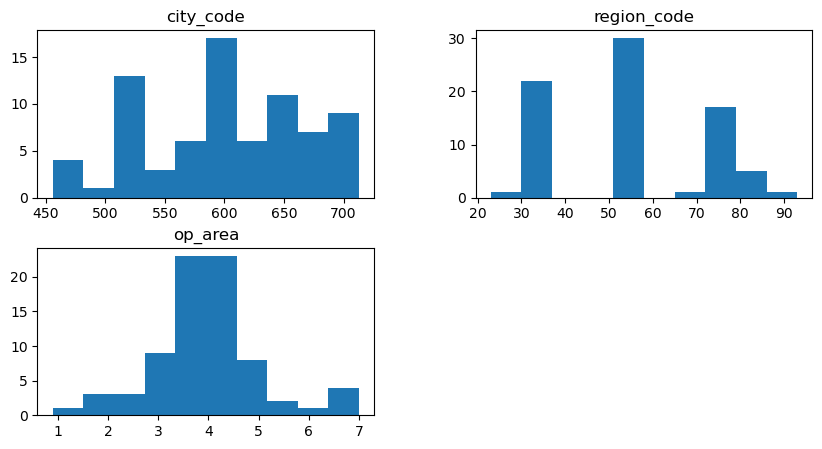

In [57]:
center_info.hist(figsize = (10, 5), grid = False)

In [59]:
meal_info[['meal_id']] = meal_info[['meal_id']].astype('category')
meal_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   meal_id   51 non-null     category
 1   category  51 non-null     object  
 2   cuisine   51 non-null     object  
dtypes: category(1), object(2)
memory usage: 3.4+ KB


### Categorical 

In [61]:
center_catcols = ['city_code', 'region_code', 'center_type', 'op_area']

In [63]:
center_info.describe(include = 'object')

,center_type
count,77
unique,3
top,TYPE_A
freq,43


In [65]:
meal_info.describe(include = 'object')

,category,cuisine
count,51,51
unique,14,4
top,Beverages,Thai
freq,12,15


[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


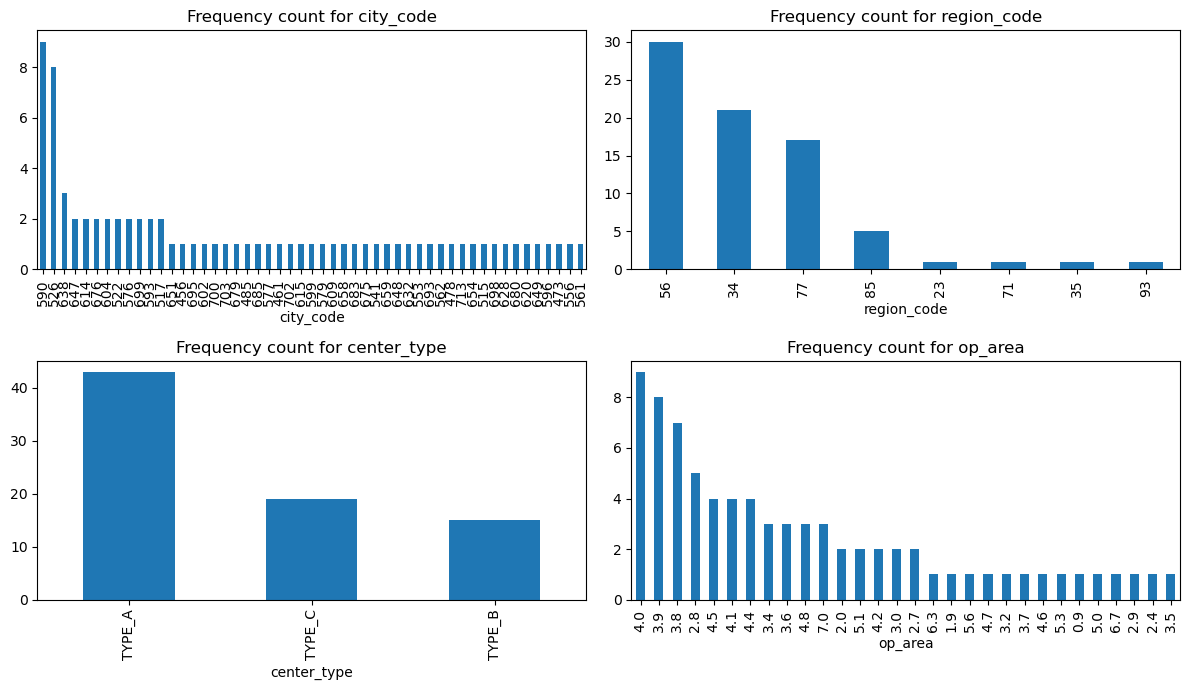

In [67]:
fig, axs = plt.subplots(nrows = 2, ncols=2, figsize=(12, 7))
print(axs)
for i, cat in enumerate(center_catcols):
    center_info[cat].value_counts().plot(kind = 'bar', title = f"Frequency count for {cat}", ax = axs[i//2, i%2])

plt.tight_layout()
plt.show()

In [69]:
center_info.center_type.value_counts()

center_type
TYPE_A    43
TYPE_C    19
TYPE_B    15
Name: count, dtype: int64

In [71]:
center_info.center_type.value_counts(normalize=True)

center_type
TYPE_A    0.558442
TYPE_C    0.246753
TYPE_B    0.194805
Name: proportion, dtype: float64

In [73]:
center_info.op_area.value_counts(normalize=True)

op_area
4.0    0.116883
3.9    0.103896
3.8    0.090909
2.8    0.064935
4.5    0.051948
4.1    0.051948
4.4    0.051948
3.4    0.038961
3.6    0.038961
4.8    0.038961
7.0    0.038961
2.0    0.025974
5.1    0.025974
4.2    0.025974
3.0    0.025974
2.7    0.025974
6.3    0.012987
1.9    0.012987
5.6    0.012987
4.7    0.012987
3.2    0.012987
3.7    0.012987
4.6    0.012987
5.3    0.012987
0.9    0.012987
5.0    0.012987
6.7    0.012987
2.9    0.012987
2.4    0.012987
3.5    0.012987
Name: proportion, dtype: float64

In [75]:
center_info[center_catcols].nunique()

city_code      51
region_code     8
center_type     3
op_area        30
dtype: int64

In [77]:
for col in center_catcols:
    print(center_info[col].value_counts())

city_code
590    9
526    8
638    3
647    2
614    2
676    2
604    2
522    2
576    2
699    2
593    2
517    2
651    1
456    1
695    1
602    1
700    1
703    1
679    1
485    1
685    1
577    1
461    1
702    1
615    1
599    1
579    1
609    1
658    1
683    1
675    1
541    1
659    1
648    1
632    1
553    1
693    1
562    1
478    1
713    1
654    1
515    1
698    1
628    1
680    1
620    1
649    1
596    1
473    1
556    1
561    1
Name: count, dtype: int64
region_code
56    30
34    21
77    17
85     5
23     1
71     1
35     1
93     1
Name: count, dtype: int64
center_type
TYPE_A    43
TYPE_C    19
TYPE_B    15
Name: count, dtype: int64
op_area
4.0    9
3.9    8
3.8    7
2.8    5
4.5    4
4.1    4
4.4    4
3.4    3
3.6    3
4.8    3
7.0    3
2.0    2
5.1    2
4.2    2
3.0    2
2.7    2
6.3    1
1.9    1
5.6    1
4.7    1
3.2    1
3.7    1
4.6    1
5.3    1
0.9    1
5.0    1
6.7    1
2.9    1
2.4    1
3.5    1
Name: count, dtype: int64


In [79]:
meal_info.category.value_counts()

category
Beverages       12
Extras           3
Soup             3
Other Snacks     3
Salad            3
Rice Bowl        3
Starters         3
Sandwich         3
Pasta            3
Desert           3
Biryani          3
Pizza            3
Fish             3
Seafood          3
Name: count, dtype: int64

In [81]:
meal_info.cuisine.value_counts()

cuisine
Thai           15
Indian         12
Italian        12
Continental    12
Name: count, dtype: int64

### Dependent variable distribution

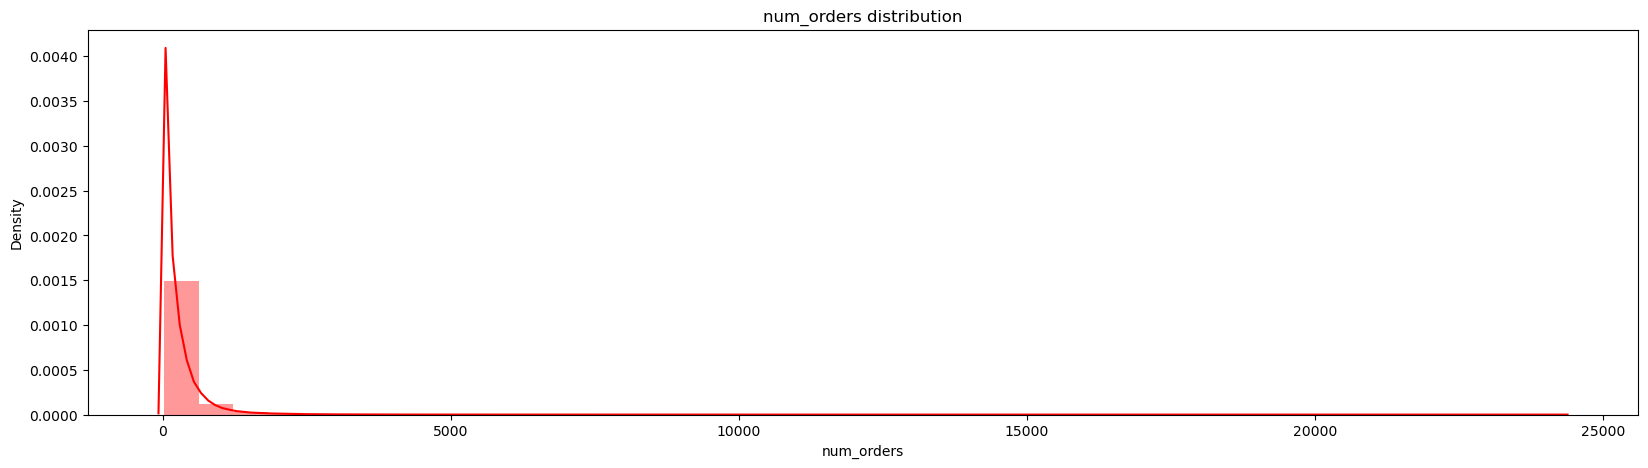

In [83]:
plt.figure(figsize=(20,5))
sns.distplot(train_df['num_orders'], bins=40, kde=True, color='red')
plt.title('num_orders distribution')
plt.show()

* ***num_orders distribution is very right skewed***

In [85]:
train_df.query("num_orders > 15000")

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,Date
14050,1452474,5,43,2290,159.08,311.43,1,1,24299,2020-01-29
19700,1300512,7,43,2290,159.08,311.43,1,1,15336,2020-02-12


In [87]:
len(train_df.query("num_orders > 5000"))

263

In [89]:
len(train_df.query("num_orders > 3000"))

1133

In [91]:
len(train_df)

456548

In [93]:
print(f'Percentage of num_orders over 3000: {100 * len(train_df.query("num_orders > 3000"))/len(train_df):.2f}%') 

Percentage of num_orders over 3000: 0.25%


In [95]:
print(f'Percentage of num_orders over 2000: {100 * len(train_df.query("num_orders > 2000"))/len(train_df):.2f}%')

Percentage of num_orders over 2000: 0.74%


In [97]:
print(f'Percentage of num_orders over 1500: {100 * len(train_df.query("num_orders > 1500"))/len(train_df):.2f}%')

Percentage of num_orders over 1500: 1.54%


In [99]:
print(f'Percentage of num_orders over 1000: {100 * len(train_df.query("num_orders > 1000"))/len(train_df):.2f}%')

Percentage of num_orders over 1000: 3.77%


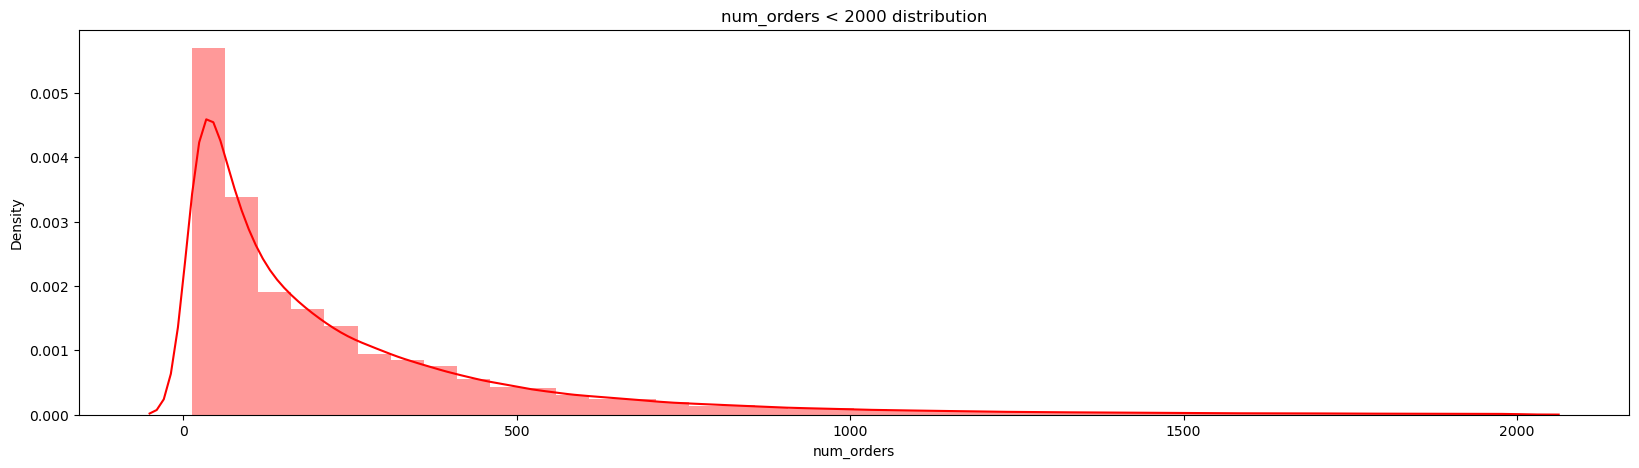

In [101]:
plt.figure(figsize=(20,5))
sns.distplot(train_df.query("num_orders < 2000")['num_orders'], bins=40, kde=True, color='red')
plt.title('num_orders < 2000 distribution')
plt.show()

#### Merge the reference data ####

##### Merge center info

In [103]:
df = pd.merge(train_df, center_info, on="center_id", how="left")
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,Date,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,2020-01-01,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,2020-01-01,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,2020-01-01,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,2020-01-01,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,2020-01-01,647,56,TYPE_C,2.0


##### Merge meal info

In [105]:
df = pd.merge(df, meal_info, on="meal_id", how="left")
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,Date,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,2020-01-01,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,2020-01-01,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,2020-01-01,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,2020-01-01,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,2020-01-01,647,56,TYPE_C,2.0,Beverages,Indian


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     456548 non-null  category      
 1   week                   456548 non-null  int64         
 2   center_id              456548 non-null  category      
 3   meal_id                456548 non-null  category      
 4   checkout_price         456548 non-null  float64       
 5   base_price             456548 non-null  float64       
 6   emailer_for_promotion  456548 non-null  int64         
 7   homepage_featured      456548 non-null  int64         
 8   num_orders             456548 non-null  int64         
 9   Date                   456548 non-null  datetime64[ns]
 10  city_code              456548 non-null  int64         
 11  region_code            456548 non-null  int64         
 12  center_type            456548 non-null  obje

#### Create a `revenue` column for analysis purpose

In [109]:
df['revenue'] = df.checkout_price * df.num_orders
df.head(2)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,Date,city_code,region_code,center_type,op_area,category,cuisine,revenue
0,1379560,1,55,1885,136.83,152.29,0,0,177,2020-01-01,647,56,TYPE_C,2.0,Beverages,Thai,24218.91
1,1466964,1,55,1993,136.83,135.83,0,0,270,2020-01-01,647,56,TYPE_C,2.0,Beverages,Thai,36944.10


* *Note: Since all the features in meal_info will be tied to the meal_id, and all features in center_info will be related to center_id,*
    * Does it make sense that center_id and meail_id could technically represent the sum of their features for this particular use case??
    * *i.e., predictions are also by week per center and per meal*

#### EDA ####

1. Handle Missing values
2. Understand the features that need to be encoded
3. Correlation of features
4. Feature selection
5. Distribution of orders across centers
6. Distribution of orders by meal ids
7. Orders by center type, by other key center features
8. Orders by meal category and cuisine
9. Impact of email promo and featuring on homepage

*Note that most of these are not really necessary for the problem statement, since the goal is simply predicting the orders for next 10 weeks by center_id and meal_id*

#### Drop Columns
* Drop 'id' column as it is not needed for modeling

In [111]:
df.drop('id', axis=1, inplace=True)
df.head(2)

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,Date,city_code,region_code,center_type,op_area,category,cuisine,revenue
0,1,55,1885,136.83,152.29,0,0,177,2020-01-01,647,56,TYPE_C,2.0,Beverages,Thai,24218.91
1,1,55,1993,136.83,135.83,0,0,270,2020-01-01,647,56,TYPE_C,2.0,Beverages,Thai,36944.10


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   week                   456548 non-null  int64         
 1   center_id              456548 non-null  category      
 2   meal_id                456548 non-null  category      
 3   checkout_price         456548 non-null  float64       
 4   base_price             456548 non-null  float64       
 5   emailer_for_promotion  456548 non-null  int64         
 6   homepage_featured      456548 non-null  int64         
 7   num_orders             456548 non-null  int64         
 8   Date                   456548 non-null  datetime64[ns]
 9   city_code              456548 non-null  int64         
 10  region_code            456548 non-null  int64         
 11  center_type            456548 non-null  object        
 12  op_area                456548 non-null  floa

* ***Convert `center_id, meal_id, city_code, region_code, center_type` to `category` type***

In [115]:
df[['center_id', 'meal_id', 'city_code', 'region_code', 'center_type']] = df[['center_id', 'meal_id', 'city_code', 'region_code', 'center_type']].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   week                   456548 non-null  int64         
 1   center_id              456548 non-null  category      
 2   meal_id                456548 non-null  category      
 3   checkout_price         456548 non-null  float64       
 4   base_price             456548 non-null  float64       
 5   emailer_for_promotion  456548 non-null  int64         
 6   homepage_featured      456548 non-null  int64         
 7   num_orders             456548 non-null  int64         
 8   Date                   456548 non-null  datetime64[ns]
 9   city_code              456548 non-null  category      
 10  region_code            456548 non-null  category      
 11  center_type            456548 non-null  category      
 12  op_area                456548 non-null  floa

In [117]:
df.head(2)

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,Date,city_code,region_code,center_type,op_area,category,cuisine,revenue
0,1,55,1885,136.83,152.29,0,0,177,2020-01-01,647,56,TYPE_C,2.0,Beverages,Thai,24218.91
1,1,55,1993,136.83,135.83,0,0,270,2020-01-01,647,56,TYPE_C,2.0,Beverages,Thai,36944.10


##### Features to be encoded #####
1. center_type - OneHotEncoder
2. category - OneHotEncoder
3. cuisine - OneHotEncoder

In [120]:
cols_to_encode = ['center_type', 'category', 'cuisine']

##### Distribution of orders by categorical columns #####

In [123]:
def catcol_info_dist(col, xticks=45):
    print(pd.DataFrame({col: df[col].value_counts(),
                        "Percentage": 100 * df[col].value_counts() / len(df)}))
    print("--------------------------------------------")
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=xticks)

              category  Percentage
category                          
Beverages       127890   28.012389
Rice Bowl        33408    7.317522
Sandwich         33291    7.291895
Pizza            33138    7.258382
Starters         29941    6.558128
Other Snacks     29379    6.435030
Desert           29294    6.416412
Salad            28559    6.255421
Pasta            27694    6.065956
Seafood          26916    5.895547
Biryani          20614    4.515188
Extras           13562    2.970553
Soup             12675    2.776269
Fish             10187    2.231310
--------------------------------------------


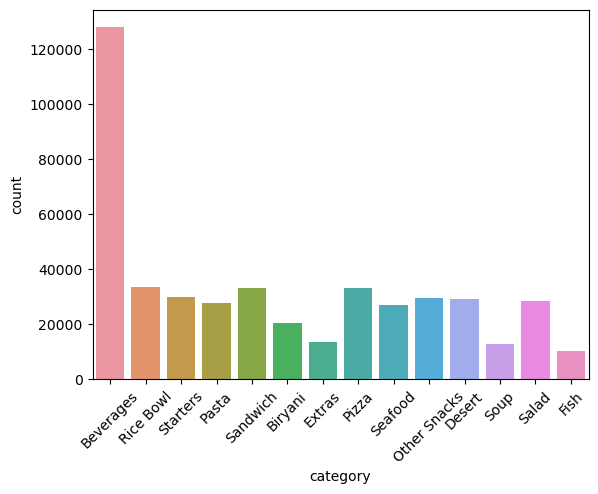

In [125]:
catcol_info_dist('category')

* ***Beverages seem to be the most ordered category by far***
* ***Rest of the categories seem relatively equally ordered except Fish, Soup and Extras which are about 50% of the rest of the categories***

             cuisine  Percentage
cuisine                         
Italian       122925   26.924880
Thai          118216   25.893444
Indian        112612   24.665972
Continental   102795   22.515705
--------------------------------------------


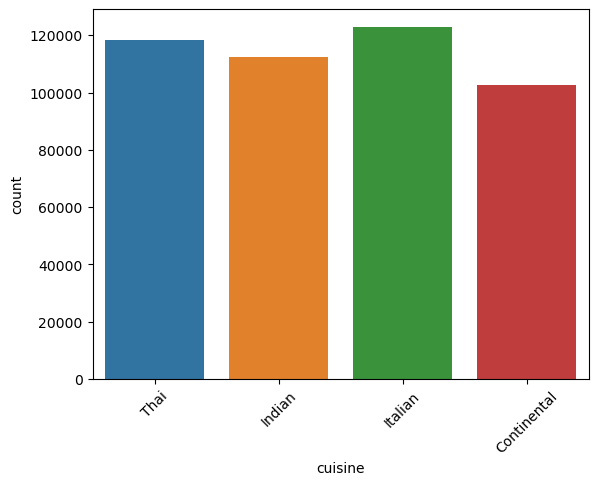

In [128]:
catcol_info_dist('cuisine')        

* ***Orders are fairly evenly distributed by cuisine***

             center_type  Percentage
center_type                         
TYPE_A            262881   57.580145
TYPE_C             99593   21.814355
TYPE_B             94074   20.605500
--------------------------------------------


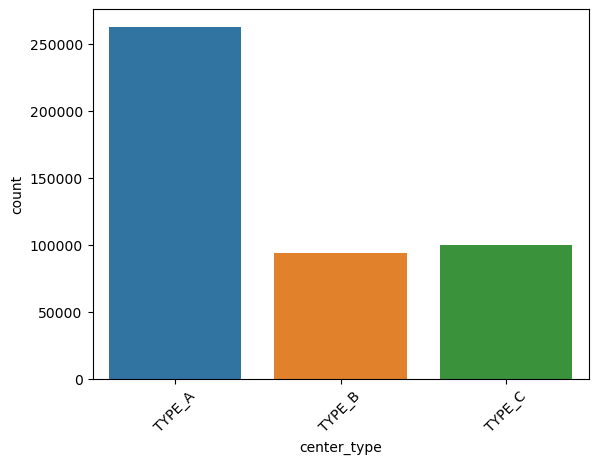

In [131]:
catcol_info_dist('center_type')

* ***TYPE_A centers seem to get the bulk of the orders - almost 2.5 times the other types***

                       emailer_for_promotion  Percentage
emailer_for_promotion                                   
0                                     419498   91.884753
1                                      37050    8.115247
--------------------------------------------


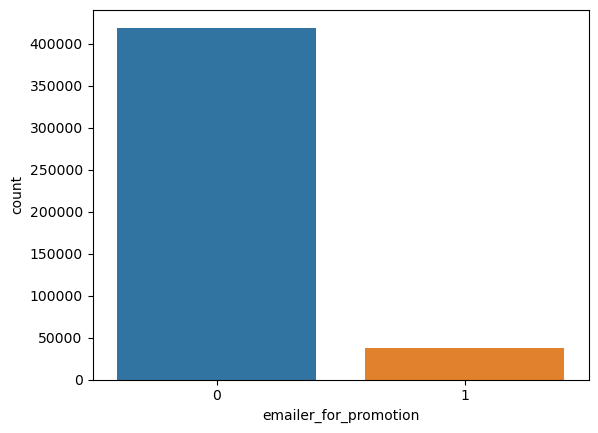

In [134]:
catcol_info_dist('emailer_for_promotion', 0)

                   homepage_featured  Percentage
homepage_featured                               
0                             406693   89.080009
1                              49855   10.919991
--------------------------------------------


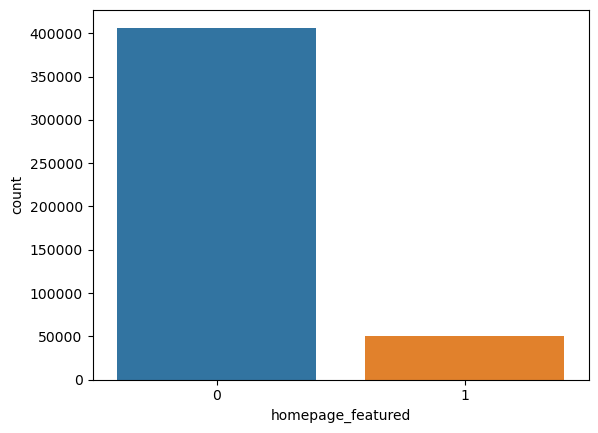

In [136]:
catcol_info_dist('homepage_featured', 0)

         op_area  Percentage
op_area                     
4.0        52548   11.509852
3.9        48533   10.630427
3.8        40080    8.778924
4.4        26060    5.708053
4.5        25688    5.626572
2.8        25503    5.586050
4.1        23346    5.113592
7.0        20686    4.530958
4.8        18648    4.084565
3.4        17258    3.780106
3.6        16821    3.684388
5.1        13366    2.927622
4.2        12608    2.761594
2.7        12430    2.722605
3.0        11184    2.449688
2.0         9512    2.083461
6.7         7046    1.543321
6.3         7015    1.536531
5.6         6993    1.531712
3.7         6801    1.489657
3.5         6666    1.460087
3.2         6333    1.387149
5.0         6164    1.350132
5.3         6053    1.325819
4.6         5983    1.310487
4.7         5975    1.308734
2.4         5021    1.099775
2.9         4712    1.032093
1.9         4083    0.894320
0.9         3432    0.751728
--------------------------------------------


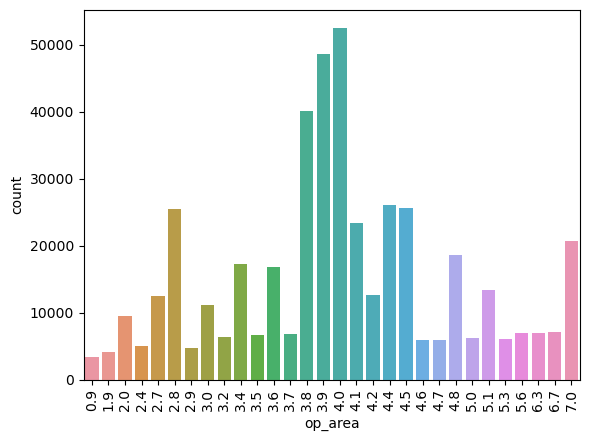

In [138]:
catcol_info_dist('op_area', 90)

In [140]:
corr = df.corr(numeric_only=True).round(3)
corr

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,op_area,revenue
week,1.000,0.027,0.029,-0.001,-0.008,-0.017,0.002,0.005
checkout_price,0.027,1.000,0.953,0.005,-0.057,-0.282,0.022,-0.048
base_price,0.029,0.953,1.000,0.171,0.057,-0.222,0.018,0.025
emailer_for_promotion,-0.001,0.005,0.171,1.000,0.391,0.277,-0.019,0.341
homepage_featured,-0.008,-0.057,0.057,0.391,1.000,0.294,0.041,0.294
num_orders,-0.017,-0.282,-0.222,0.277,0.294,1.000,0.177,0.899
op_area,0.002,0.022,0.018,-0.019,0.041,0.177,1.000,0.200
revenue,0.005,-0.048,0.025,0.341,0.294,0.899,0.200,1.000


#### Independent variables correlation
* ***`checkout_price` and `base_price` are highly correlated***
* *should consider dropping `base_price` for modeling*
* ***`emailer_for_promotion` and `homepage_featured` also have some positive correlation***
* ***`base_price` seems to have some positive correlation with `emailer_for_promotion`. Perhaps in many cases, the base_price is already high when promotions are being offered?***

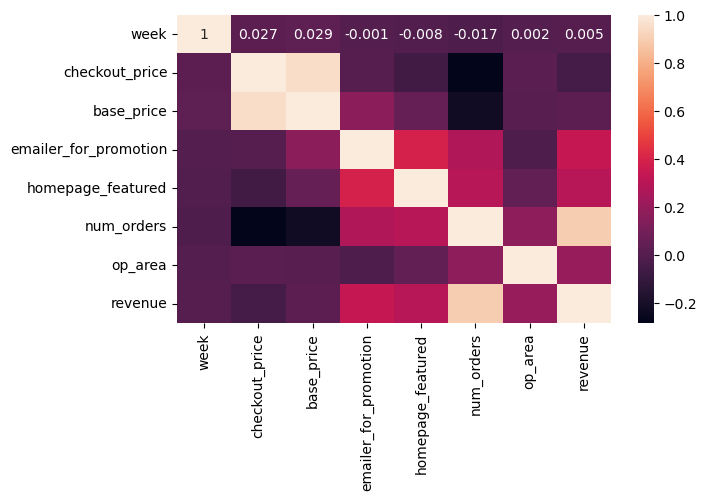

In [142]:
plt.figure(figsize= (7, 4))
sns.heatmap(corr, annot= True);

In [144]:
corr[['num_orders']].sort_values('num_orders')

,num_orders
checkout_price,-0.282
base_price,-0.222
week,-0.017
op_area,0.177
emailer_for_promotion,0.277
homepage_featured,0.294
revenue,0.899
num_orders,1.000


#### Correlation with target variable
* ***Shows good positive correlation with `emailer_for_promotion, homepage_featured, op_area` - as expected***
* ***Shows negative correlation with `checkout_price, base_price`***

#### Let's try to quantify the correlation of orders to these values,
* `emailer_for_promotion, homepage_featured, op_area, checkout_price`

In [146]:
df.head(2)

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,Date,city_code,region_code,center_type,op_area,category,cuisine,revenue
0,1,55,1885,136.83,152.29,0,0,177,2020-01-01,647,56,TYPE_C,2.0,Beverages,Thai,24218.91
1,1,55,1993,136.83,135.83,0,0,270,2020-01-01,647,56,TYPE_C,2.0,Beverages,Thai,36944.10


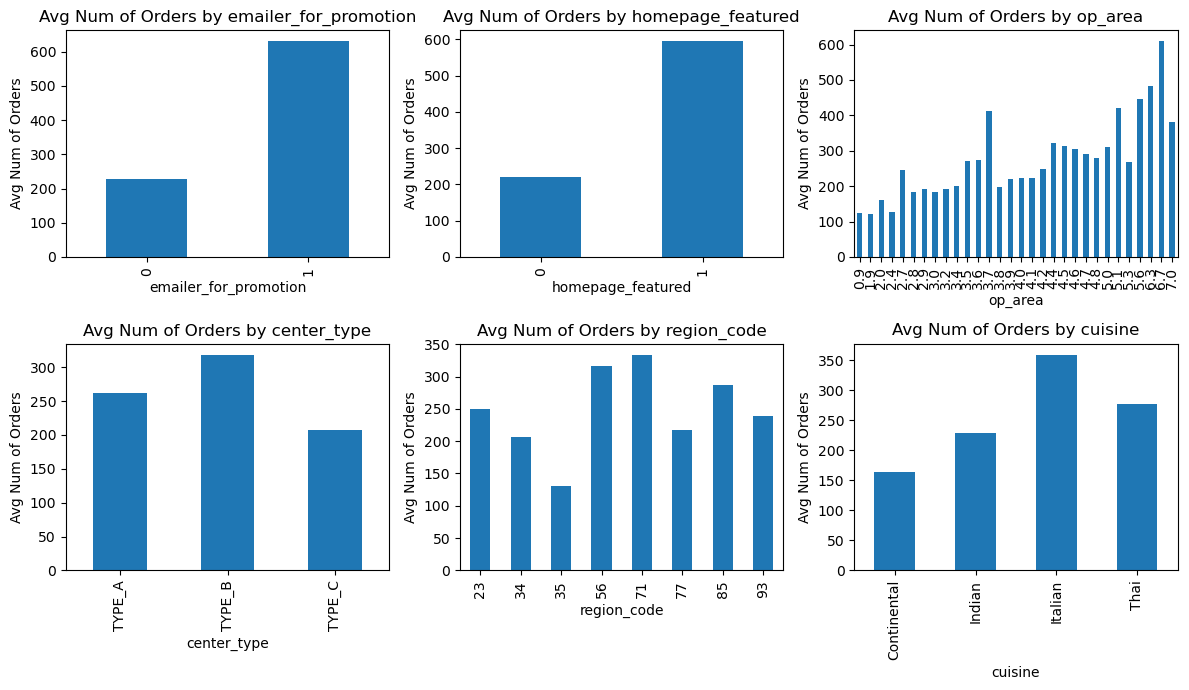

In [148]:
fig, axs = plt.subplots(2, 3, figsize=(12, 7))
cols = ['emailer_for_promotion', 'homepage_featured', 'op_area', 'center_type', 'region_code', 'cuisine']
axes = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]

for col, ax_pos in zip(cols, axes):
    ax = axs[ax_pos]
    df.groupby(col)['num_orders'].mean().plot(kind='bar', ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel('Avg Num of Orders')
    ax.set_title('Avg Num of Orders by ' + col)
plt.tight_layout()
plt.show()


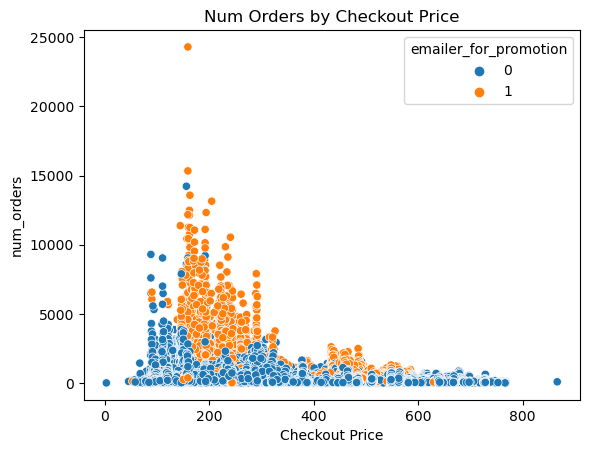

In [150]:
import seaborn as sns

# Create a scatter chart
sns.scatterplot(x='checkout_price', y='num_orders', data=df, hue='emailer_for_promotion')

# Add title and labels
plt.title('Num Orders by Checkout Price')
plt.xlabel('Checkout Price')
plt.ylabel('num_orders')

# Show the chart
plt.show()


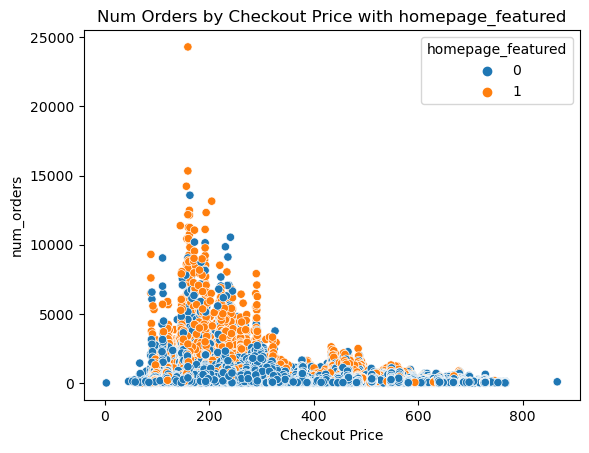

In [151]:
# Create a scatter chart - add hue of homepage_featured
sns.scatterplot(x='checkout_price', y='num_orders', data=df, hue='homepage_featured')

# Add title and labels
plt.title('Num Orders by Checkout Price with homepage_featured')
plt.xlabel('Checkout Price')
plt.ylabel('num_orders')

# Show the chart
plt.show()


* ***`Lower prices` clearly attract more orders***
* ***And `homepage_featured, emailer_for_promotion` also have a big impact in higher number of orders***

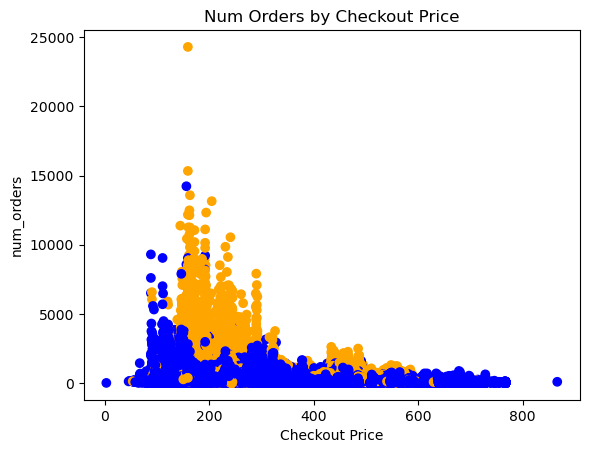

In [154]:
# This is just checking out how matplotlib scatter plot with hue compares to seaborn plot
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['blue', 'orange'])
# Create a scatter chart
plt.scatter(x='checkout_price', y='num_orders', data=df, c=cmap(df['emailer_for_promotion']))

# Add title and labels
plt.title('Num Orders by Checkout Price')
plt.xlabel('Checkout Price')
plt.ylabel('num_orders')

# Show the chart
plt.show()

##### Create a scatter plot to see impact of op_area on num_orders

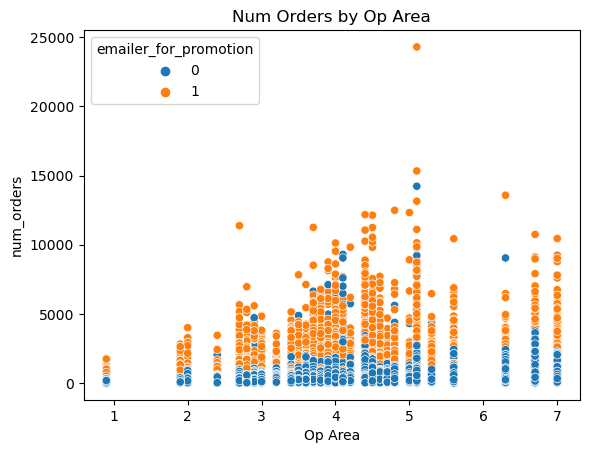

In [155]:
sns.scatterplot(x='op_area', y='num_orders', data=df, hue='emailer_for_promotion')

# Add title and labels
plt.title('Num Orders by Op Area')
plt.xlabel('Op Area')
plt.ylabel('num_orders')

# Show the chart
plt.show()

In [160]:
df['op_area']

0         2.0
1         2.0
2         2.0
3         2.0
4         2.0
         ... 
456543    4.5
456544    4.5
456545    4.5
456546    4.5
456547    4.5
Name: op_area, Length: 456548, dtype: float64

In [162]:
df.groupby('op_area')['num_orders'].mean()

op_area
0.9    123.881119
1.9    121.807005
2.0    159.955950
2.4    126.972117
2.7    246.027353
2.8    182.588637
2.9    190.707343
3.0    184.437411
3.2    192.376283
3.4    201.533492
3.5    271.852235
3.6    273.239165
3.7    411.307161
3.8    199.050998
3.9    221.259040
4.0    224.183566
4.1    222.844213
4.2    247.154029
4.4    321.098734
4.5    313.123015
4.6    306.439412
4.7    291.059582
4.8    280.837731
5.0    309.301590
5.1    422.077959
5.3    269.116802
5.6    446.994852
6.3    481.969779
6.7    609.784984
7.0    380.994344
Name: num_orders, dtype: float64

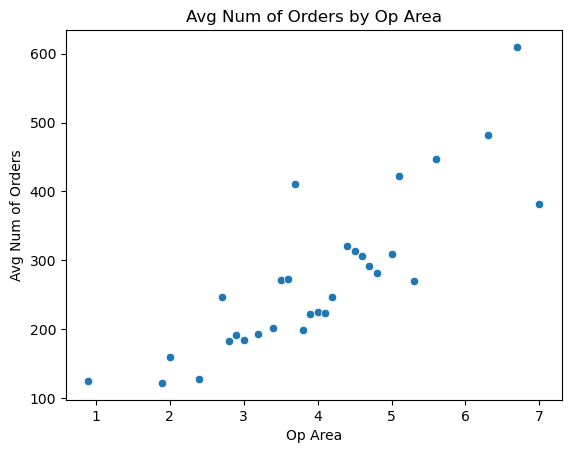

In [164]:
#df.groupby('op_area')['num_orders'].mean().plot(kind='scatter')
sns.scatterplot(df.groupby('op_area')['num_orders'].mean())
plt.xlabel('Op Area')
plt.ylabel('Avg Num of Orders')
plt.title('Avg Num of Orders by Op Area')
plt.show()

* ***Average number of orders is positively correlated with `op_area`***

##### Let's check how the order numbers look by the center-meal combo

In [167]:
# Center-Meal groupby
cmdf=df.groupby(['center_id', 'meal_id'])[['num_orders']].sum()
cmdf

num_orders
center_id meal_id            
10        1062         137742
          1109         221685
          1198          50393
          1207          31031
          1216          20940
...                       ...
186       2707          30004
          2760           8513
          2826          38809
          2867           3734
          2956           1458

[3927 rows x 1 columns]

In [169]:
#just a quick check on the number of center-meal combos
len(center_info) * len(meal_info)

3927

In [171]:
#check the center-meal combos with top num_orders
cmdf.sort_values(by='num_orders', ascending=False).head()

num_orders
center_id meal_id            
13        1885         334334
          2290         319676
174       1885         310876
43        2290         308764
13        2707         298925

* ***Above is a good list of top center-meal combos to build and test some models***

##### Decompose the Time Series
- at the overall company level

In [173]:
ts=df.groupby("Date")["num_orders"].sum()

In [175]:
ts.head(2)

Date
2020-01-01    792261
2020-01-08    787084
Name: num_orders, dtype: int64

In [177]:
type(ts)

pandas.core.series.Series

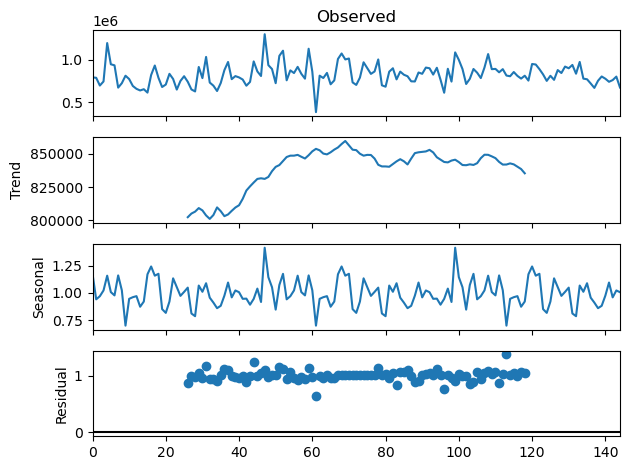

In [179]:
# Visualize Residuals, Seasonal, Trend, and level
from statsmodels.tsa.seasonal import seasonal_decompose

res = seasonal_decompose(ts.values, period=52, model="multiplicative")
res.plot()
plt.show()

* *We can see some repeating seasonal pattern*
* *And increasing trend during the 2nd quartile of the 145 week period, but then it plateaud and slightly declined*

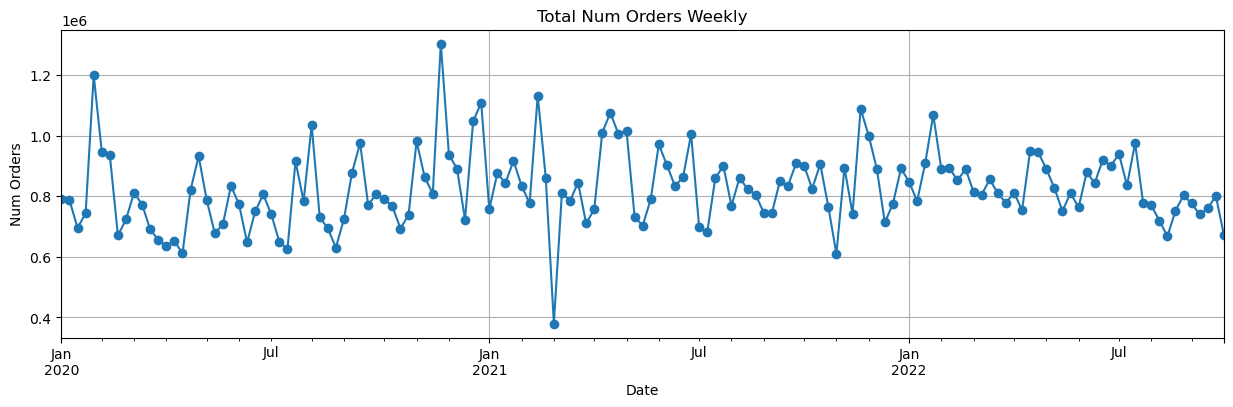

In [205]:
# Plot the num_orders Series
ts.plot(figsize=(15, 4), marker='o')
plt.title('Total Num Orders Weekly')
plt.xlabel('Date')
plt.ylabel('Num Orders')
plt.grid(True)
plt.show()


#### Let's take a look at the revenue over time

In [183]:
ts_rev = df.groupby("Date")["revenue"].sum()
ts_rev.head()

Date
2020-01-01    2.185165e+08
2020-01-08    1.999142e+08
2020-01-15    1.780359e+08
2020-01-22    1.961360e+08
2020-01-29    2.596449e+08
Name: revenue, dtype: float64

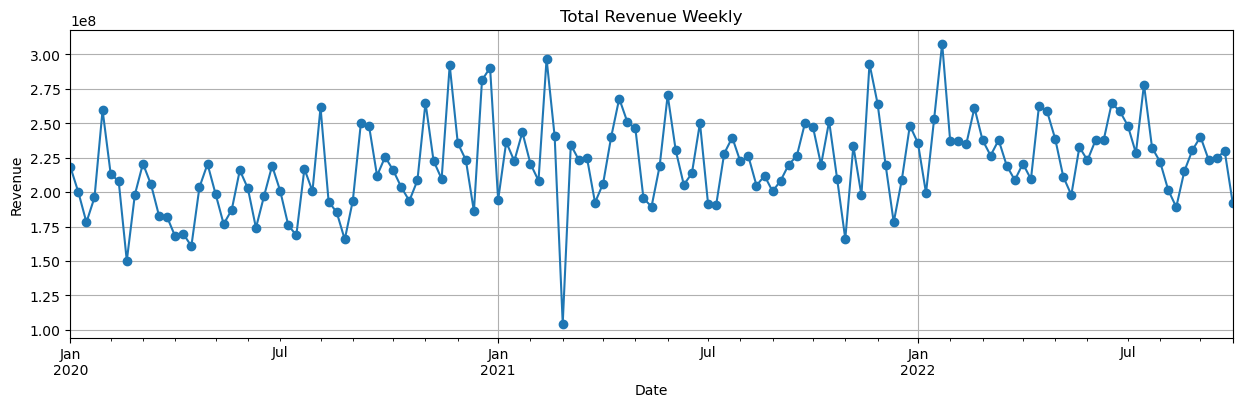

In [203]:
# Plot the revenue Series
ts_rev.plot(figsize=(15, 4), marker='o')
plt.title('Total Revenue Weekly')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()


### Modeling
#### Let's start with the overall company level summarized data

#### sktime - prepare data: X, y and train/test split

In [401]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.compose import make_reduction
from sktime.utils.plotting import plot_series
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

import time


In [361]:
# set y to the prepared time series data
y = ts

# Create an exogenous dataframe with emailer_for_promotion and homepage_featured avg values per week
X = df.groupby("Date")[['emailer_for_promotion', 'homepage_featured']].mean()
X

,emailer_for_promotion,homepage_featured
Date,,
2020-01-01,0.122177,0.141684
2020-01-08,0.214434,0.177486
2020-01-15,0.035874,0.109003
2020-01-22,0.000000,0.101073
2020-01-29,0.117873,0.162994
...,...,...
2022-09-07,0.070794,0.091940
2022-09-14,0.071340,0.086164
2022-09-21,0.022995,0.066566


In [363]:
# Split data
y_train, y_test = temporal_train_test_split(y, test_size=10)
X_train, X_test = temporal_train_test_split(X, test_size=10)


In [365]:
y_train.shape, y_test.shape

((135,), (10,))

In [367]:
y_train.tail(2)

Date
2022-07-20    975072
2022-07-27    777106
Name: num_orders, dtype: int64

In [369]:
y_test.head(2)

Date
2022-08-03    769623
2022-08-10    719740
Name: num_orders, dtype: int64

In [371]:
# Forecasting horizon, same as test data
fh = ForecastingHorizon(y_test.index, is_relative=False)
fh

ForecastingHorizon(['2022-08-03', '2022-08-10', '2022-08-17', '2022-08-24',
               '2022-08-31', '2022-09-07', '2022-09-14', '2022-09-21',
               '2022-09-28', '2022-10-05'],
              dtype='datetime64[ns]', name='Date', freq=None, is_relative=False)

#### sktime + DummyRegression

MAPE: 0.1435


(<Figure size 1600x400 with 1 Axes>,
 <Axes: xlabel='Date', ylabel='Num orders'>)

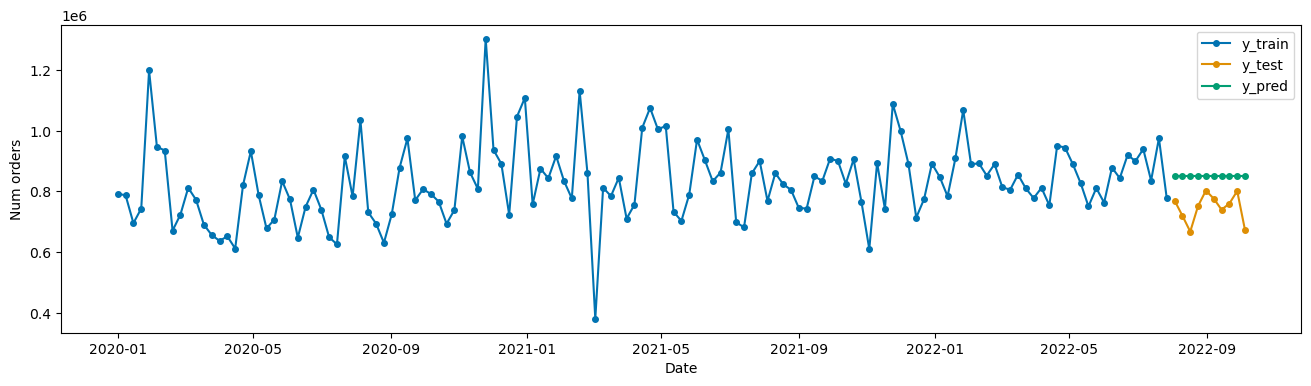

In [373]:
from sklearn.dummy import DummyRegressor

# Dummy regression forecaster
regressor = DummyRegressor()
forecaster = make_reduction(regressor, window_length=52, strategy="recursive")

# Fit and predict
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)

# Evaluate
print('MAPE: %.4f' % mean_absolute_percentage_error(y_test, y_pred, symmetric=False))

# Plot predictions with training and test data
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"], x_label='Date', y_label='Num orders')


#### sktime + LinearRegression

In [375]:
from sklearn.linear_model import LinearRegression


In [377]:
# Linear regression forecaster
regressor = LinearRegression()
forecaster = make_reduction(regressor, window_length=52, strategy="recursive")
forecaster

RecursiveTabularRegressionForecaster(estimator=LinearRegression(),
                                     window_length=52)

In [379]:
# Fit and predict
#forecaster.fit(y_train)
#y_pred = forecaster.predict(fh)
forecaster.fit(y=y_train, X=X_train)
y_pred = forecaster.predict(fh=fh, X=X_test)


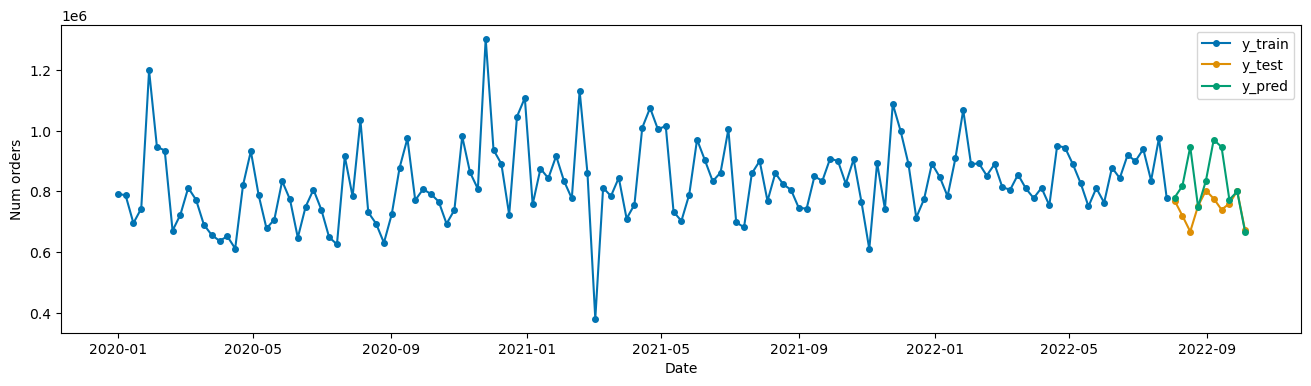

In [381]:
# Plot predictions with training and test data
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"], x_label='Date', y_label='Num orders');


In [383]:
# Evaluate
print('MAPE: %.4f' % mean_absolute_percentage_error(y_test, y_pred, symmetric=False))

MAPE: 0.1167


* ***LinearRegression came out with better performance metric than the DummyRegressor***
* Note: adding the exogenous dataframe seems to make a difference

#### sktime + XGBoost

In [385]:
from xgboost import XGBRegressor

In [387]:
# XGBoost forecaster
regressor = XGBRegressor(objective='reg:squarederror', random_state=42)
forecaster = make_reduction(regressor, window_length=52, strategy="recursive")

# Fit and predict
forecaster.fit(y=y_train, X=X_train)
y_pred = forecaster.predict(fh=fh, X=X_test)
y_pred

Date
2022-08-03    880932.6875
2022-08-10    946593.6875
2022-08-17    916759.5625
2022-08-24    973968.1250
2022-08-31    741130.4375
2022-09-07    710823.5625
2022-09-14    831829.9375
2022-09-21    830519.0625
2022-09-28    883996.7500
2022-10-05    863293.8750
Name: num_orders, dtype: float64

(<Figure size 1600x400 with 1 Axes>,
 <Axes: xlabel='Date', ylabel='Num orders'>)

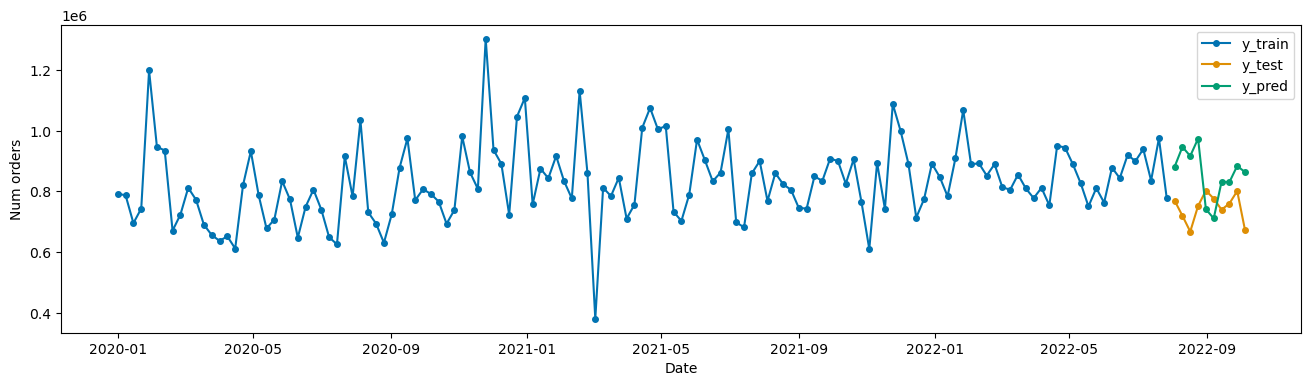

In [389]:
# Plot predictions with training and test data
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"], x_label='Date', y_label='Num orders')


In [391]:
# Evaluate
print('MAPE: %.4f' % mean_absolute_percentage_error(y_test, y_pred, symmetric=False))

MAPE: 0.1895


* ***Worse performance than the LinearRegression and even Dummy Regressor***
  

#### Tuning the hyperparameters

In [393]:
from sktime.split import SingleWindowSplitter

validation_size = 10
cv = SingleWindowSplitter(window_length=len(y)-validation_size, fh=validation_size)

In [395]:
cv

SingleWindowSplitter(fh=10, window_length=135)

##### Let's use Randomized Search

In [397]:
from sktime.forecasting.model_selection import ForecastingRandomizedSearchCV

# XGBoost forecaster with grid of parameters
param_grid = {
    'estimator__max_depth': [3, 5, 6, 10, 15, 20],
    'estimator__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'estimator__subsample': np.arange(0.5, 1.0, 0.1),
    'estimator__colsample_bytree': np.arange(0.4, 1.0, 0.1),
    'estimator__colsample_bylevel': np.arange(0.4, 1.0, 0.1),
    'estimator__n_estimators': [100, 500, 1000]
}
regressor = XGBRegressor(objective='reg:squarederror', random_state=42)
forecaster = make_reduction(regressor, window_length=52, strategy="recursive")
gscv = ForecastingRandomizedSearchCV(forecaster, cv=cv, param_distributions=param_grid, n_iter=100, random_state=42)
gscv

ForecastingRandomizedSearchCV(cv=SingleWindowSplitter(fh=10, window_length=135),
                              forecaster=RecursiveTabularRegressionForecaster(estimator=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_...
                              n_iter=100,
                              param_distributions={'estimator__colsample_bylevel': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                                   'estimator__colsample_bytree': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                                   'estimator__learning_rate': [0.01,
                                                                                0.1,
                                                                                0.2,
                                                                                0.3],
                                                   'estimator__max_depth': [3,
                                                                            5,
                                                                            6,
                                                                            10,
                                                                            15,
                                                                            20],
                                                   'estimator__n_estimators': [100,
                                                                               500,
                                                                               1000],
                                                   'estimator__subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                              random_state=42)

In [399]:
# Fit and predict
start = time.time()

gscv.fit(y=y_train, X=X_train)
y_pred = gscv.predict(fh=fh, X=X_test)

time_taken = time.time() - start
print(f"Time taken: {time_taken:.2f} seconds")


In [400]:
# Evaluate
print('MAPE: %.4f' % mean_absolute_percentage_error(y_test, y_pred, symmetric=False))


MAPE: 0.0803


(<Figure size 1600x400 with 1 Axes>,
 <Axes: xlabel='Date', ylabel='Num orders'>)

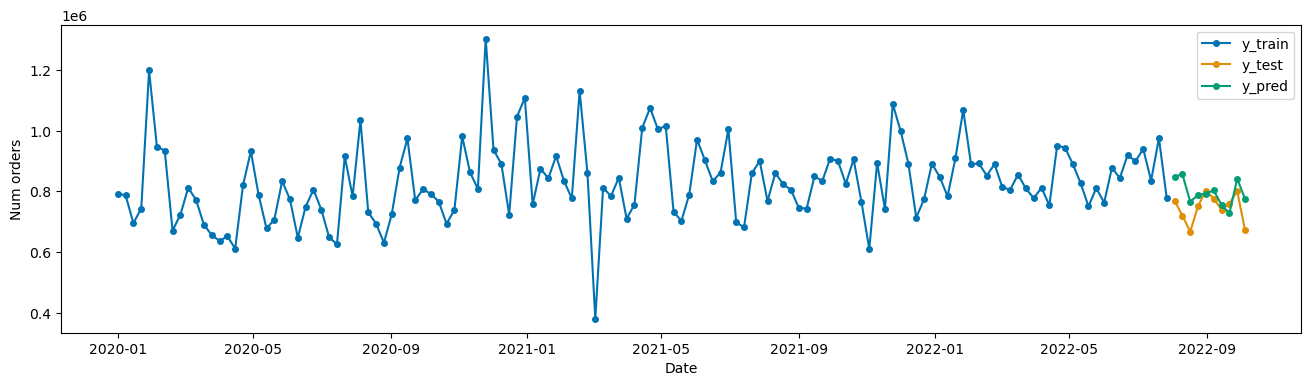

In [405]:
# Plot predictions with training and test data
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"], x_label='Date', y_label='Num orders')


In [407]:
gscv.cv_results_

,mean_test_MeanAbsolutePercentageError,mean_fit_time,mean_pred_time,params,rank_test_MeanAbsolutePercentageError
0,0.084002,8.336727,0.042538,"{'estimator__subsample': 0.5, 'estimator__n_es...",77.0
1,0.032344,3.335104,0.035456,"{'estimator__subsample': 0.5, 'estimator__n_es...",27.0
2,0.179457,3.311634,0.025311,"{'estimator__subsample': 0.5, 'estimator__n_es...",96.0
3,0.024508,1.213360,0.038674,"{'estimator__subsample': 0.6, 'estimator__n_es...",18.0
4,0.076531,8.839659,0.031313,"{'estimator__subsample': 0.8999999999999999, '...",69.0
...,...,...,...,...,...
95,0.073954,1.438128,0.027657,"{'estimator__subsample': 0.8999999999999999, '...",62.0
96,0.037411,1.589855,0.027233,"{'estimator__subsample': 0.7, 'estimator__n_es...",32.0
97,0.075012,2.568441,0.030595,"{'estimator__subsample': 0.7999999999999999, '...",63.0
98,0.003936,5.257968,0.011206,"{'estimator__subsample': 0.6, 'estimator__n_es...",3.0


In [409]:
gscv.best_params_

{'estimator__subsample': 0.5,
 'estimator__n_estimators': 1000,
 'estimator__max_depth': 10,
 'estimator__learning_rate': 0.2,
 'estimator__colsample_bytree': 0.4,
 'estimator__colsample_bylevel': 0.6}

#### Model - for the top center-meal combo
- *This will enable us to use all the features available*

*Bringing this center-meal summary data down here for reference*

In [171]:
#check the center-meal combos with top num_orders
cmdf.sort_values(by='num_orders', ascending=False).head()

num_orders
center_id meal_id            
13        1885         334334
          2290         319676
174       1885         310876
43        2290         308764
13        2707         298925

##### Build model for `center_id = 13, meal_id = 1885`

In [419]:
df_cm1 = df.query("(center_id == 13) & (meal_id == 1885)")
df_cm1.sample(5)

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,Date,city_code,region_code,center_type,op_area,category,cuisine,revenue
342017,111,13,1885,148.47,147.47,0,0,2294,2022-02-09,590,56,TYPE_B,6.7,Beverages,Thai,340590.18
148894,51,13,1885,122.28,141.65,0,1,2808,2020-12-16,590,56,TYPE_B,6.7,Beverages,Thai,343362.24
400908,129,13,1885,151.38,149.38,0,1,2754,2022-06-15,590,56,TYPE_B,6.7,Beverages,Thai,416900.52
221833,74,13,1885,146.53,144.53,0,0,3051,2021-05-26,590,56,TYPE_B,6.7,Beverages,Thai,447063.03
296453,97,13,1885,143.56,145.56,0,0,1836,2021-11-03,590,56,TYPE_B,6.7,Beverages,Thai,263576.16


In [421]:
df_cm1.shape

(145, 16)

In [425]:
df_cm1.set_index('Date', inplace=True)
df_cm1.head(2)

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,revenue
Date,,,,,,,,,,,,,,,
2020-01-01,1,13,1885,135.86,122.28,0,1,2132,590,56,TYPE_B,6.7,Beverages,Thai,289653.52
2020-01-08,2,13,1885,135.86,121.28,0,1,1891,590,56,TYPE_B,6.7,Beverages,Thai,256911.26


#### Prep data: X, y and train/test split

In [486]:
y = df_cm1['num_orders']

# Create an exogenous dataframe with all relevant features from the df
X = df_cm1
#X = df_cm1[['checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured']]
X = df_cm1[['checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured']]
X

,checkout_price,base_price,emailer_for_promotion,homepage_featured
Date,,,,
2020-01-01,135.86,122.28,0,1
2020-01-08,135.86,121.28,0,1
2020-01-15,133.86,122.28,0,1
2020-01-22,134.86,122.28,0,1
2020-01-29,143.56,120.28,0,1
...,...,...,...,...
2022-09-07,151.38,150.38,0,1
2022-09-14,151.38,150.38,0,1
2022-09-21,150.41,149.38,0,1


In [488]:
# Split data
y_train, y_test = temporal_train_test_split(y, test_size=10)
X_train, X_test = temporal_train_test_split(X, test_size=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((135, 4), (10, 4), (135,), (10,))

In [490]:
# Forecasting horizon, same as test data
fh = ForecastingHorizon(y_test.index, is_relative=False)


In [492]:
cv = SingleWindowSplitter(window_length=len(y)-validation_size, fh=validation_size)

# XGBoost forecaster with grid of parameters
param_grid = {
    'estimator__max_depth': [3, 5, 6, 10, 15, 20],
    'estimator__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'estimator__subsample': np.arange(0.5, 1.0, 0.1),
    'estimator__colsample_bytree': np.arange(0.4, 1.0, 0.1),
    'estimator__colsample_bylevel': np.arange(0.4, 1.0, 0.1),
    'estimator__n_estimators': [100, 500, 1000]
}
regressor = XGBRegressor(objective='reg:squarederror', random_state=42)
forecaster = make_reduction(regressor, window_length=52, strategy="recursive")
gscv = ForecastingRandomizedSearchCV(forecaster, cv=cv, param_distributions=param_grid, n_iter=100, random_state=42)

# Fit and predict
start = time.time()

gscv.fit(y=y_train, X=X_train)
y_pred = gscv.predict(fh=fh, X=X_test)

time_taken = time.time() - start
print(f"Time taken: {time_taken:.2f} seconds")


Time taken: 23.38 seconds


In [494]:
# Evaluate
print('MAPE: %.4f' % mean_absolute_percentage_error(y_test, y_pred, symmetric=False))


MAPE: 0.1252


(<Figure size 1600x400 with 1 Axes>,
 <Axes: xlabel='Date', ylabel='Num orders'>)

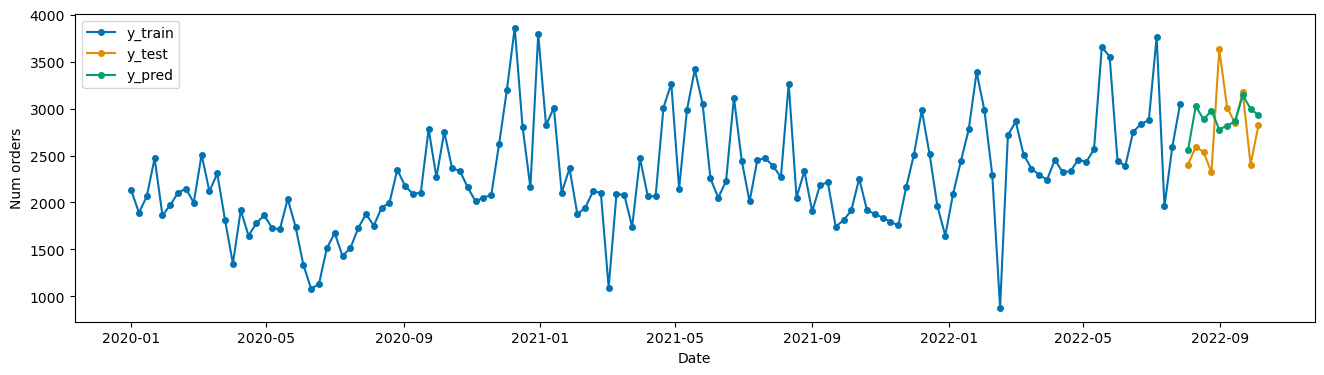

In [496]:
# Plot predictions with training and test data
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"], x_label='Date', y_label='Num orders')


In [498]:
gscv.best_params_

{'estimator__subsample': 0.6,
 'estimator__n_estimators': 1000,
 'estimator__max_depth': 6,
 'estimator__learning_rate': 0.3,
 'estimator__colsample_bytree': 0.4,
 'estimator__colsample_bylevel': 0.8999999999999999}

In [500]:
gscv.best_score_

0.0005200491386020976

##### Remove Seasonality and Trend

* ***throws frequency is missing error -- something to do with the Deseasonalizer?? - LEAVING THIS ASIDE***

In [322]:
from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.transformations.series.detrend import Deseasonalizer, Detrender
from sktime.forecasting.trend import PolynomialTrendForecaster

# XGBoost forecaster with grid of parameters and detrender and deseasonaliser
regressor = XGBRegressor(objective='reg:squarederror', random_state=42)
forecaster = TransformedTargetForecaster(
    [("deseasonalize", Deseasonalizer(model="multiplicative", sp=52)),
     ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=1))),
     ("forecast", make_reduction(regressor, window_length=52, strategy="recursive"))]
)

# Param grid
param_grid = {
    'deseasonalize__model': ['multiplicative', 'additive'],
    'detrend__forecaster__degree': [1, 2, 3],
    'forecast__estimator__max_depth': [3, 5, 6, 10, 15, 20],
    'forecast__estimator__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'forecast__estimator__subsample': np.arange(0.5, 1.0, 0.1),
    'forecast__estimator__colsample_bytree': np.arange(0.4, 1.0, 0.1),
    'forecast__estimator__colsample_bylevel': np.arange(0.4, 1.0, 0.1),
    'forecast__estimator__n_estimators': [100, 500, 1000]
}

cv = SingleWindowSplitter(window_length=len(y)-validation_size, fh=validation_size)

# Randomised search
start = time.time()
gscv = ForecastingRandomizedSearchCV(forecaster, cv=cv, param_distributions=param_grid, n_iter=100, random_state=42, error_score="raise")

# Fit and predict
#y_train.index.freq='W'
gscv.fit(y=y_train, X=X_train)
y_pred = gscv.predict(fh=fh, X=X_test)

time_taken = time.time() - start
print(f"Time taken: {time_taken:.2f} seconds")


ValueError: frequency is missing

MAPE: 0.1447


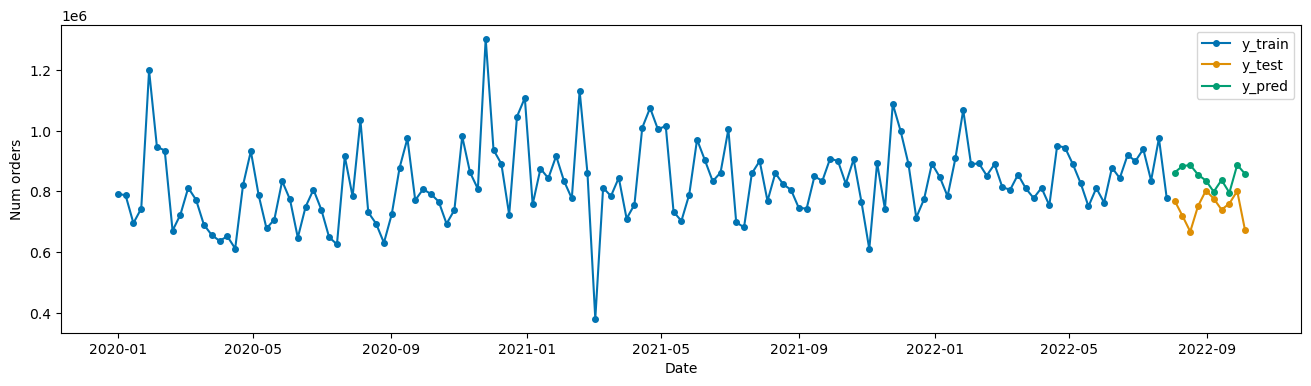

In [308]:
# Plot predictions with training and test data
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"], x_label='Date', y_label='Num orders')

# Evaluate
print('MAPE: %.4f' % mean_absolute_percentage_error(y_test, y_pred, symmetric=False))
